In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Auto dataset in a DataFrame using Pandas

In [2]:
data = pd.read_csv('data/auto-dataset.csv')
print(data)


      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

### 1. Scatterplots between features

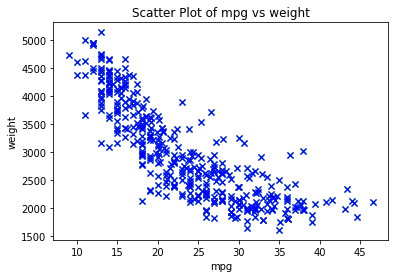

In [3]:
feat1 = data['mpg']
feat2 = data['weight']
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of mpg vs weight')
plt.plot(feat1, feat2, 'x', color='blue')
#Similarly add scatter plots for every pair of features

/tmp/ipykernel_424490/425242762.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


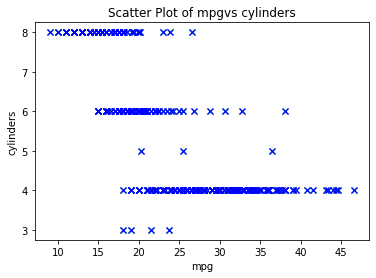

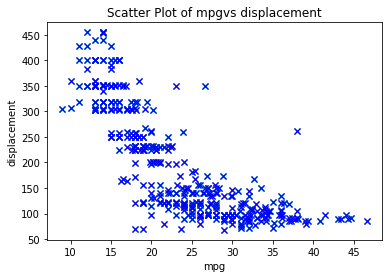

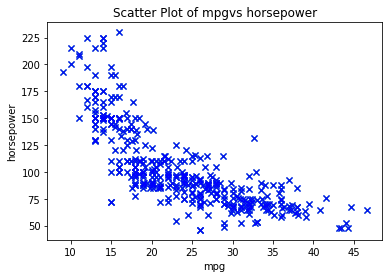

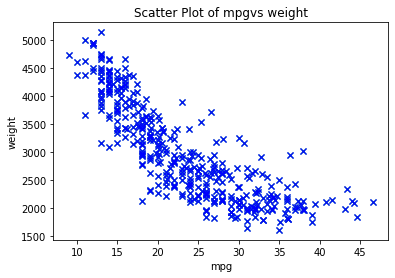

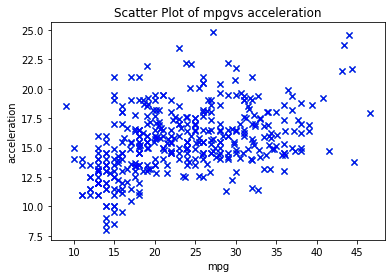

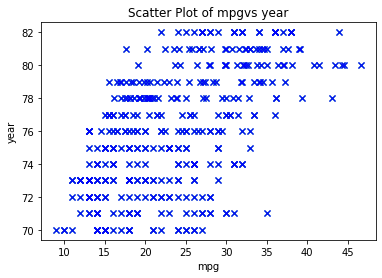

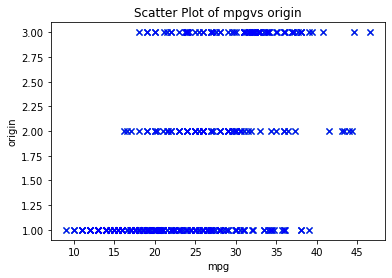

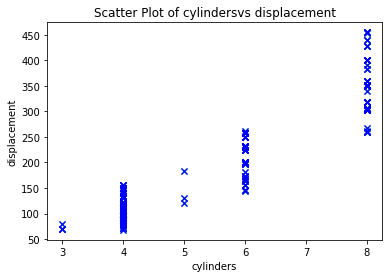

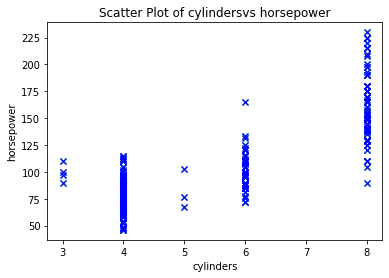

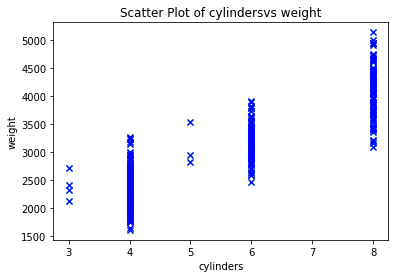

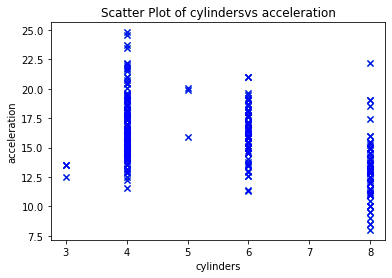

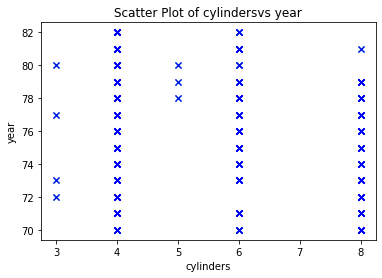

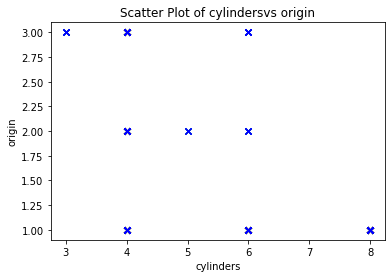

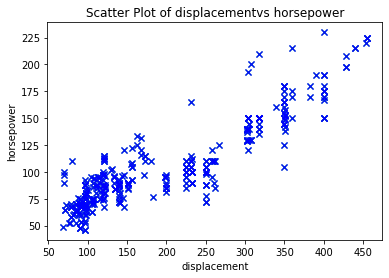

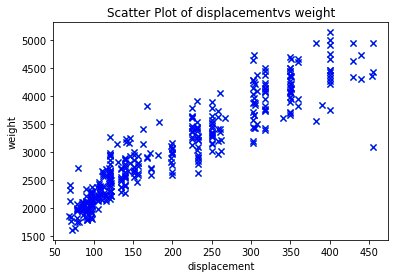

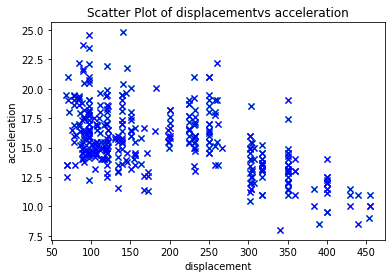

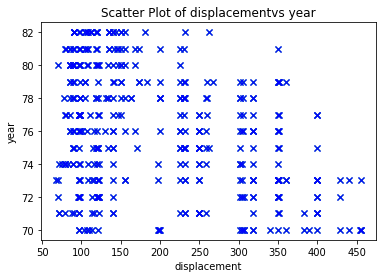

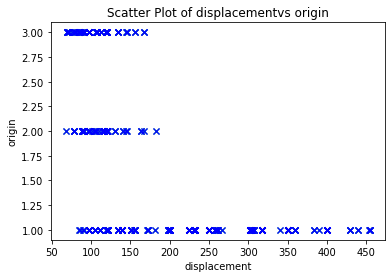

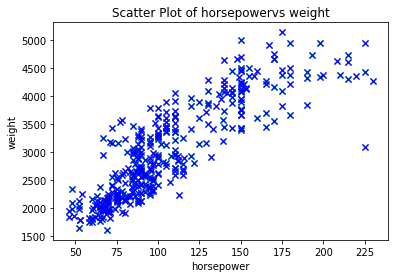

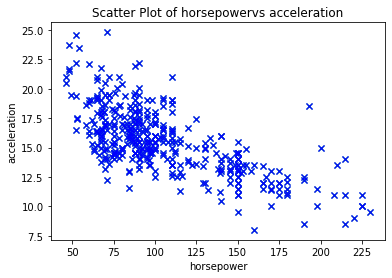

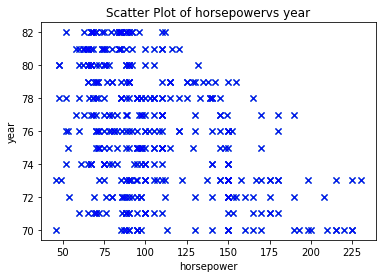

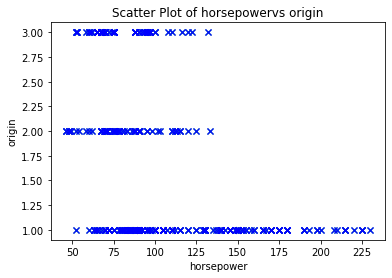

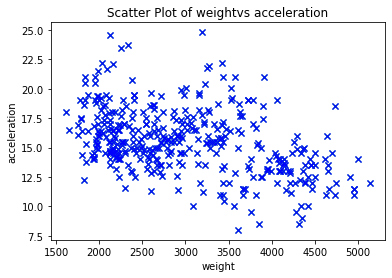

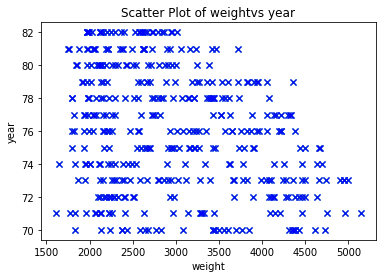

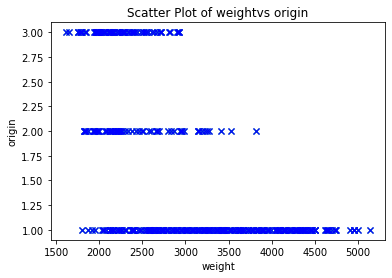

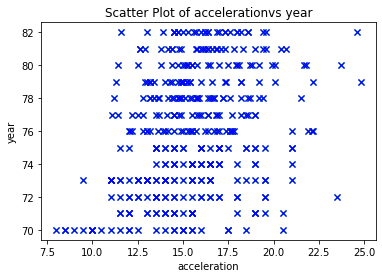

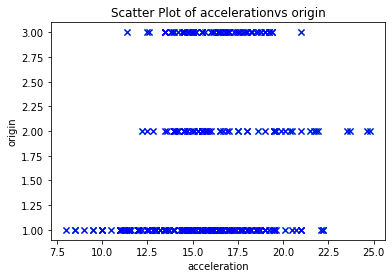

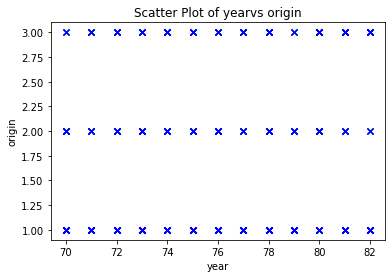

In [4]:
#feat1 = data['mpg']
#feat2 = data['weight']
#plt.figure()
#plt.scatter(feat1, feat2, marker='x')
#plt.xlabel('mpg')
#plt.ylabel('weight')
#plt.title('Scatter Plot of mpg vs weight')
#plt.plot(feat1, feat2, 'x', color='blue')
l = list(data.columns)
#print(l)
for i, column in enumerate(data):
    for j in range(i+1, len(data.columns)-1):
        plt.figure()
        #print(data[column])
        #print(j)
        #print(data[l[j]])
        plt.scatter(data[l[i]], data[l[j]], marker='x')
#        
        plt.xlabel(l[i])
        plt.ylabel(l[j])
        plt.title("Scatter Plot of " + l[i] + "vs " + l[j])
        plt.plot(data[column], data[l[j]], 'x', color='blue')
        #print(i,data[column])
        #print(j)

From the figures above:
There are few variable with almost linear relation for example horsepower vs weight (positive relation) and horespower vs acceleration (negative relation). 

While, we see that relation between weight and acceleration is sort of scattered throughout the cordinate (randomaly scattered) in which we can not fit any (non-)linear curve to these two variables. 

Moreover, we have a scatter plot of displacement vs year, here as the number of years of the increases, we see that the displacement of the car decreases. Since the relation does not seems to be linearly correlated, we can make some statement from the graphs itself. 

### 2. Correlation

In [5]:
for i, column in enumerate(data):
    for j in range(i+1, len(data.columns)-1):
#        plt.figure()
        #print(data[column])
        #print(j)
        #print(data[l[j]])
        print("correlation between " + l[i] + " and " + l[j] + " is: " )
        R = np.corrcoef(data[l[i]], data[l[j]])
        
        print(R)
#        plt.scatter(data[l[i]], data[l[j]], marker='x')
#        
#        plt.xlabel(l[i])
#        plt.ylabel(l[j])
#        plt.title("Scatter Plot of " + l[i] + "vs " + l[j])
#        plt.plot(data[column], data[l[j]], 'x', color='blue')

correlation between mpg and cylinders is: 
[[ 1.         -0.77761751]
 [-0.77761751  1.        ]]
correlation between mpg and displacement is: 
[[ 1.         -0.80512695]
 [-0.80512695  1.        ]]
correlation between mpg and horsepower is: 
[[ 1.         -0.77842678]
 [-0.77842678  1.        ]]
correlation between mpg and weight is: 
[[ 1.         -0.83224421]
 [-0.83224421  1.        ]]
correlation between mpg and acceleration is: 
[[1.         0.42332854]
 [0.42332854 1.        ]]
correlation between mpg and year is: 
[[1.         0.58054097]
 [0.58054097 1.        ]]
correlation between mpg and origin is: 
[[1.         0.56520876]
 [0.56520876 1.        ]]
correlation between cylinders and displacement is: 
[[1.        0.9508233]
 [0.9508233 1.       ]]
correlation between cylinders and horsepower is: 
[[1.         0.84298336]
 [0.84298336 1.        ]]
correlation between cylinders and weight is: 
[[1.         0.89752734]
 [0.89752734 1.        ]]
correlation between cylinders and

From the results above:

Notice that there exist highly positive correlation between the variables cylinders and displacement with correlation value: 0.9508233.
While highly anti-correlated variable are mpg and weight with correlation coefficient: -0.83224421.

Yes, results differ from what we see in the plots. For instance, plot for cylinders vs displacement does not seem to be in a continuous relation with each other but there correlation coefficient comes out to be the highest positve value. Similarly for cylinders vs horsepower plot.

In [76]:
pip install -U scikit-learn

     |████████████████████████████████| 31.2 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 119.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 233 kB 110.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### 3. Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as statmodel

#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
#y = np.dot(X, np.array([1, 2])) + 3
#print(y)
#reg = LinearRegression().fit(X, y)
#print(reg)

linear_model1 = LinearRegression()

y = np.array(data['mpg'])
x1 = np.array(data['cylinders'])
x1 = x1.reshape(-1,1)
y = y.reshape(-1,1)
#print(x.shape, y.shape)
reg1 = linear_model1.fit(x1,y)
R1_sq = reg1.score(x1,y)
print("R² value of mpg vs cylinders model is " + str(R1_sq))

linear_model2 = LinearRegression()

#y = np.array(data['mpg'])
x2 = np.array(data['displacement'])
x2 = x2.reshape(-1,1)
y = y.reshape(-1,1)
#print(x.shape, y.shape)
reg2 = linear_model2.fit(x2,y)
R2_sq = reg2.score(x2,y)
print("R² value of mpg vs displacement model is " + str(R1_sq))

linear_model3 = LinearRegression()

#y = np.array(data['mpg'])
x3 = np.array(data['horsepower'])
x3 = x3.reshape(-1,1)
y = y.reshape(-1,1)
#print(x.shape, y.shape)
reg3 = linear_model3.fit(x3,y)
R3_sq = reg3.score(x3,y)
print("R² value of mpg vs horsepower model is " + str(R1_sq))

linear_model4 = LinearRegression()
x4 = np.array(data['year'])
x4 = x4.reshape(-1,1)
y = y.reshape(-1,1)
#print(x.shape, y.shape)
reg4 = linear_model4.fit(x4,y)
R4_sq = reg4.score(x4,y)
print("R² value of mpg vs year model is " + str(R1_sq))

beta = (reg1.coef_)
print("coefficient of mpg vs cylinders model fit is " + str(beta))
beta_0 = (reg1.intercept_)
print("intercept of mpg vs cylinders model fit is " + str(beta_0))



### As the value of predictor increases, value of the outcome decreases.
### for predictor = cylinder
### for outcome = mpg
x = 5
y1 = reg1.intercept_ + reg1.coef_ * x
print("for lower x value output  is: "+ str(y1))

x = 20
y2 = reg1.intercept_ + reg1.coef_ * x
print("for higher x value output  is: "+ str(y2))



### significance test

X2 = statmodel.add_constant(x1)
est = statmodel.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

X2 = statmodel.add_constant(x2)
est = statmodel.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

X2 = statmodel.add_constant(x3)
est = statmodel.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


X2 = statmodel.add_constant(x4)
est = statmodel.OLS(y, X2)

est2 = est.fit()
print(est2.summary())
# Use the fit function and the score function in linear regression module of sklearn to  fit the data and observe the fit
#print(reg3.summary())


R² value of mpg vs cylinders model is 0.6046889889441245
R² value of mpg vs displacement model is 0.6046889889441245
R² value of mpg vs horsepower model is 0.6046889889441245
R² value of mpg vs year model is 0.6046889889441245
coefficient of mpg vs cylinders model fit is [[-3.55807837]]
intercept of mpg vs cylinders model fit is [42.91550535]
for lower x value output  is: [[25.12511352]]
for higher x value output  is: [[-28.246062]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.31e-80
Time:                        18:10:53   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residua

From the significance analysis above, we note that the predictor names 'year' shows significance relation with the outcome 'mpg' as t-statistic for the coefficient is higher and low p-value which is very close to zero.

If we look at the R² values, note that displacement vs mpg has the higher value and it depicts that approximately 64% of the outcome of the mpg points are explained by the predictor variable 'displacement'. 
If we look at other models, they have comparatively less R² values which shows they are comparatively less accurate models than displacement vs mpg model.
If we look at the R² value of year vs mpg model, it has the lowest value, which means that the although model is significant, but not accurate anough.


In [7]:
#Multiple Linear Regression
#Create a 2D matrix with each column representing all features
#Look up np.concatenate or np.stack

#Print the predictions of the your fitted model and the weights of Linear Regression (look at the function get_params())
linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year' , 'origin']])
#print(x)
#data1 = np.concatenate((x, y), axis = 0)
#print(data1)
#x = x.reshape(-1,1)
y = y.reshape(-1,1)
#data1 = np.concatenate((x, y), axis = 1)
#print(x.shape, y.shape)
#print(data1[:,:])
#print(data1[:, 0:7], data1[:, 7])
#y = data1[:, 7].reshape(-1,1)
#print(x.shape)

### fir linear model as in simple linear regression
multi_reg = linear_model.fit(x,y)


### score
R2 = (multi_reg.score(x,y))
print("R² value of mpg vs all variables model is " + str(R2))

### get prediction vector for the output variable 'y'
y_pred = (multi_reg.predict(x))
#print(y_pred)

### get weights of the MLR
print(multi_reg.get_params(deep = True))
beta = (multi_reg.coef_)
beta_0 = (multi_reg.intercept_)
print("coefficients of mpg vs all variables model fit is " + str(beta))
print("intercept of mpg vs all variables model fit is " + str(beta_0))
#R_sq = reg.score(x,y)
#print(R_sq)

### significance test

X2 = statmodel.add_constant(x)
est = statmodel.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


R² value of mpg vs all variables model is 0.8214780764810599
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
coefficients of mpg vs all variables model fit is [[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
   1.4261405 ]]
intercept of mpg vs all variables model fit is [-17.21843462]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.04e-139
Time:                        18:10:59   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df 

Here, the value of R² is highest (i.e. 0.8214780764810599) as compare to the individual models (which were less then 0.65) hence it shows that multi linear model fit is more accurate.

If we look at the p-values, variable 5 (x5) has highest p-value which shows that this variable (acceleration) is not statistically significant. similary, x3 and x1 (horsepower, cylinders) are not significant. Hence, we can remove these varibales (with high p-value).
However, the p-value of cylinders in cylinders vs mpg model fit was near to zero and t-value was highly negative, we notice that cylinders is not significant in the multiple linear regression model fit. Similarly for horsepower vs mog model fit.
However, there is predictor which is significant in both the models (simple linear and multiple linear regression) that is year. It shows statistical significance in both the models.

If the sign of the coefficient of the predictor in positive (+) it means that the outcome variable is increasing as the predictor increases in the direction of predictor's dimension. If the sign of the coefficient of the predictor in negative (-) it means that the outcome variable is decreasing as the predictor increases in the direction of predictor's dimension.

Here, since there are more positive coefficients than negative coefficients, outcome variable will increase with increase in all the variables. It is already shown for the simple linear regression.


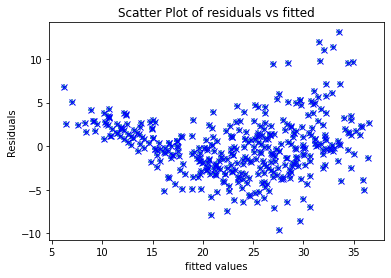

In [8]:
#Make a scatter plot of the residual vs the predictions of your linear regression model

residuals = np.array(data['mpg']).reshape(-1,1) - y_pred
#print(np.array(data['mpg']).reshape(-1,1).shape, y_pred.shape)
#print(residuals)

plt.figure()
plt.scatter(y_pred, residuals, marker='+')
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of residuals vs fitted')
plt.plot(y_pred, residuals, 'x', color='blue')


Yes, there is a non-linearity between the data. From the figure, we see that residuals first decreases and then increases with fitted values that means there is a non linear relationship between the data. 